In [18]:
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import Normalizer

import numpy as np

from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.losses import BinaryCrossentropy
from keras.utils import to_categorical

In [19]:
# importing crop data of year 2020
crop_data = pd.read_csv('./data/ndvi/crop_data_ndvi.csv')

In [20]:
X = crop_data.drop(columns=['Class of Land', 'Latitude and Longitude'])
y = crop_data['Class of Land']

del crop_data

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=40)

In [22]:
y_train = to_categorical([(0 if i == 'Non Rice' else 1) for i in y_train])
y_test = to_categorical([(0 if i == 'Non Rice' else 1) for i in y_test])

In [23]:
model = Sequential()
model.add(Dense(64, input_shape=(6,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [24]:
model.compile(loss=BinaryCrossentropy(), optimizer='adam', metrics=['accuracy'])

In [25]:
history = model.fit(X_train, y_train, epochs=200, batch_size=64, verbose=1, validation_data=(X_test, y_test), use_multiprocessing=True)

Epoch 1/200
8/8 [==============================] - 0s 12ms/step - loss: 23.8086 - accuracy: 0.3771 - val_loss: 0.6883 - val_accuracy: 0.4333
Epoch 2/200
8/8 [==============================] - 0s 2ms/step - loss: 9.1144 - accuracy: 0.5750 - val_loss: 0.6767 - val_accuracy: 0.6667
Epoch 3/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6645 - accuracy: 0.7375 - val_loss: 0.6666 - val_accuracy: 0.7167
Epoch 4/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6543 - accuracy: 0.7979 - val_loss: 0.6565 - val_accuracy: 0.7250
Epoch 5/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6422 - accuracy: 0.8042 - val_loss: 0.6461 - val_accuracy: 0.7333
Epoch 6/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6301 - accuracy: 0.8167 - val_loss: 0.6351 - val_accuracy: 0.7417
Epoch 7/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6175 - accuracy: 0.8208 - val_loss: 0.6230 - val_accuracy: 0.7667
Epoch 8/200
8/8 [========

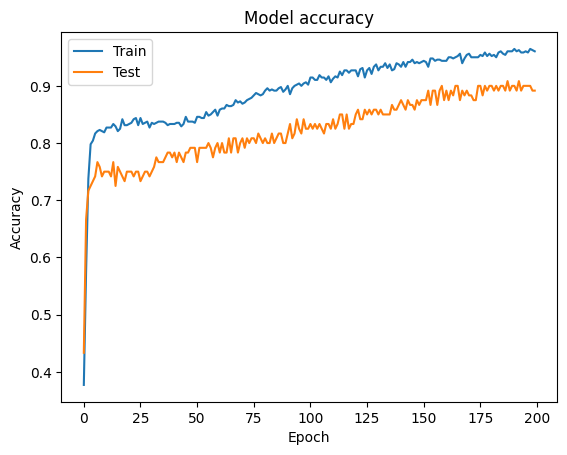

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()